In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [5]:
type(x_train)

numpy.ndarray

In [6]:
len(x_train)

60000

In [7]:
x_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train[200].shape

(28, 28)

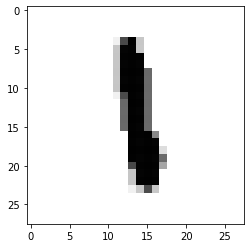

In [9]:
plt.imshow(x_train[200] , cmap = "Greys")

In [10]:
y_train[200]

1

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [13]:
x_train.shape

(60000, 784)

In [14]:
from keras.utils import np_utils

In [15]:
y_train = np_utils.to_categorical(y_train , 10)
y_test = np_utils.to_categorical(y_test , 10)

In [16]:
y_train[200]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.optimizers import sgd

In [41]:
sess = tf.InteractiveSession()
model = Sequential()

In [42]:
model.add(Dense(500 , input_dim =784))
model.add(Activation("sigmoid"))

In [43]:
model.add(Dense(500))
model.add(Activation("sigmoid"))

In [44]:
model.add(Dense(10))
model.add(Activation("softmax"))

In [45]:
model.compile(loss = "mse" , optimizer= sgd(lr = 0.1) , metrics=["accuracy"])

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(x_train , y_train , batch_size = 100 , epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 8s 129us/step - loss: 0.0832 - acc: 0.3709


In [102]:
model.layers

In [101]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions

# Testing
test = np.random.random(784)[np.newaxis,...]
layer_outs = [func([test]) for func in functors]
print(layer_outs[0][0])

[[-5.14611959e-01  6.46910250e-01  3.73627573e-01  2.31025532e-01
   1.13582504e+00 -5.61720967e-01 -4.47873116e-01 -4.53756452e-01
  -6.07990026e-01  1.75135016e+00 -3.04715544e-01 -1.57356393e+00
  -7.47175097e-01 -7.36091614e-01 -1.32940501e-01  1.21186244e+00
   1.87614903e-01  3.69943768e-01 -5.46749055e-01  4.15351957e-01
  -2.30729971e-02  6.01569951e-01 -6.57434344e-01 -3.11475009e-01
  -1.86278355e+00 -7.96345294e-01  5.24683893e-01  4.17927861e-01
   4.27564234e-01 -5.34929454e-01 -4.88355398e-01  1.06411546e-01
   7.01330602e-02  6.07635975e-01 -6.35210946e-02  1.07061660e+00
  -7.67504632e-01  2.77773112e-01  3.89136493e-01 -9.29425001e-01
   1.12150544e-02  9.74521264e-02  5.09009242e-01 -5.60579970e-02
   5.78929126e-01 -8.41666222e-01  4.31438118e-01  1.56553388e-01
  -2.26910010e-01  2.12653255e+00 -3.74245703e-01 -1.67528224e+00
   5.34768522e-01 -3.81063879e-01  6.33471906e-01  9.48038459e-01
   1.11298792e-01  1.06329417e+00  4.19583946e-01 -1.89655591e-02
  -2.78973

In [26]:
from ipywidgets import interact_manual

In [27]:
def FULL_CONNECT_NEURAL_NETWORK (num):
    plt.imshow(x_test[num].reshape(28,28) , cmap = "Greys")
    print("神經網路預測結果為 :" , predicts[num] )

In [28]:
interact_manual(FULL_CONNECT_NEURAL_NETWORK , num = (0 , 9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.FULL_CONNECT_NEURAL_NETWORK(num)>

In [29]:
model_json = model.to_json()
open("handwriting_model.json" , "w" ).write(model_json)
model.save_weights("handwriting_model_weights.h5")